In [310]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [311]:
### GET THE DATA ###

In [312]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [313]:
fetch_housing_data()

In [314]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [315]:
housing = load_housing_data()

In [316]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [317]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [318]:
# 'median_house_value' is the label we want to predict

In [319]:
housing.shape

(20640, 10)

Saving figure lat_lon


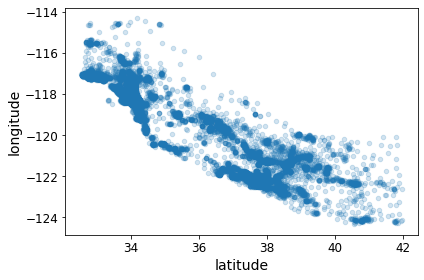

In [320]:
housing.plot(kind="scatter", x="latitude", y="longitude", alpha=0.2)
save_fig("lat_lon")

Saving figure housing_hist


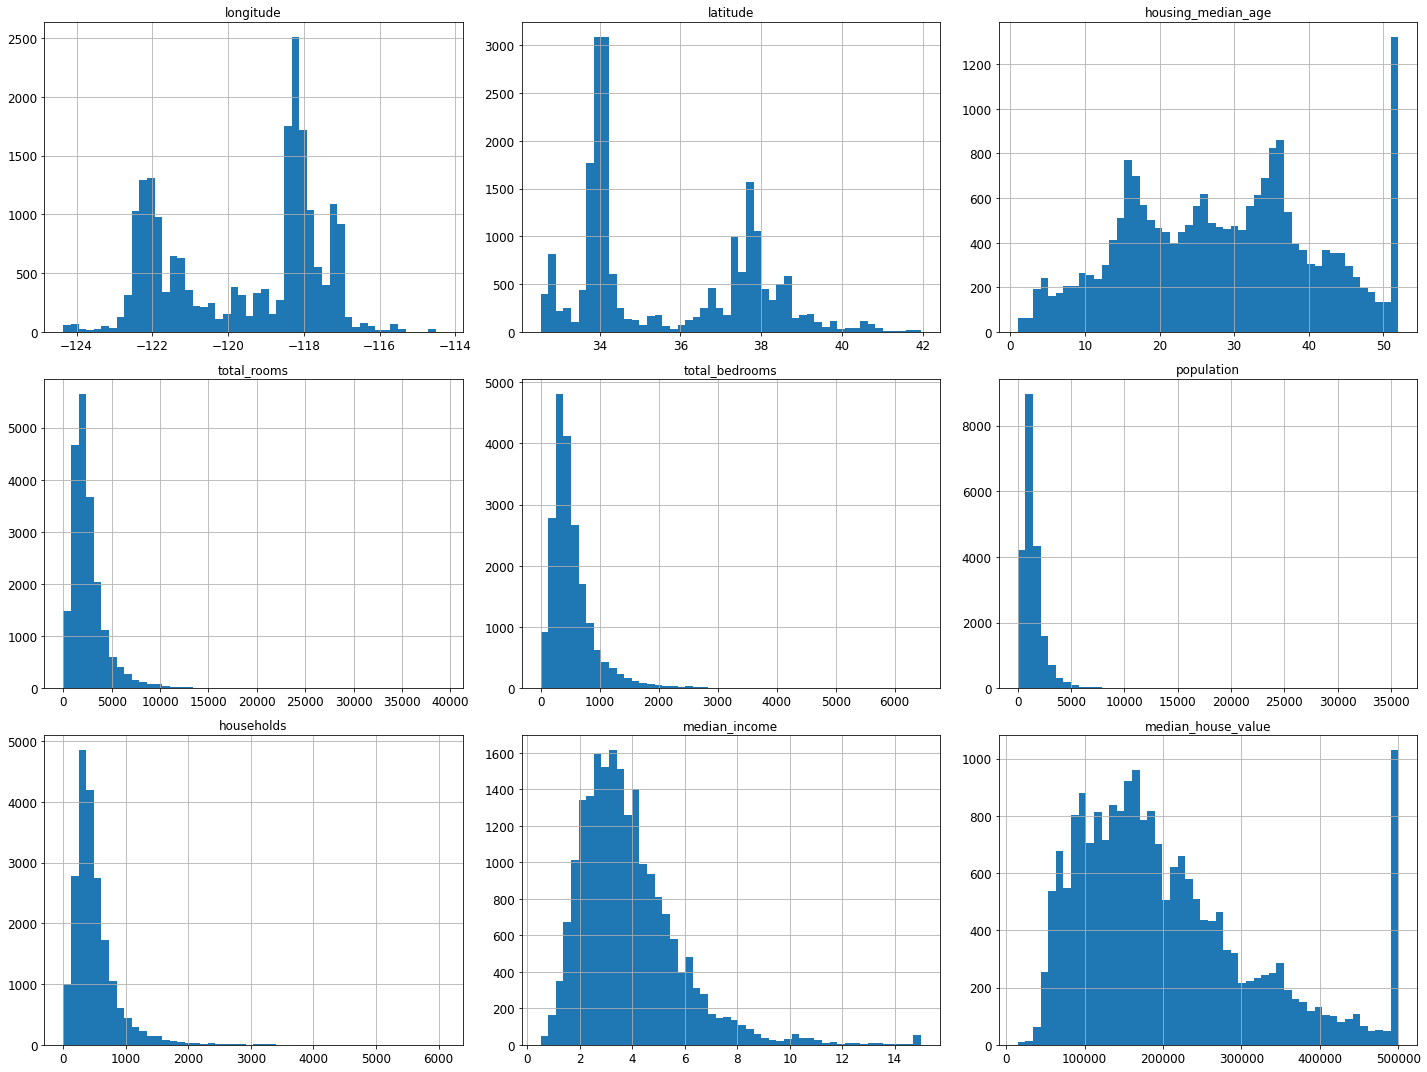

In [321]:
housing.hist(bins=50, figsize=(20, 15))
save_fig("housing_hist")

Saving figure scatter_matrix_plot


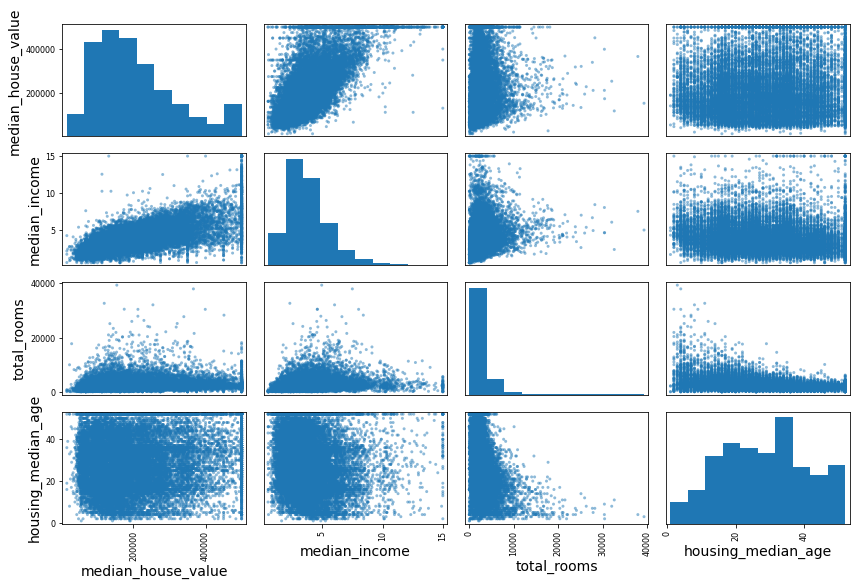

In [322]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot"

Saving figure house_val_median_inc


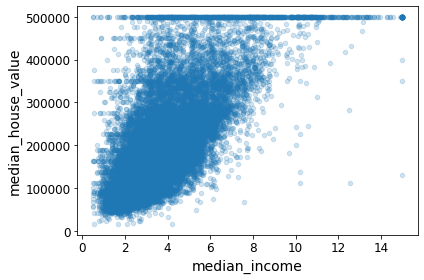

In [323]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)
save_fig("house_val_median_inc")

In [324]:
# We will use the fact that the 'median_income' has an important impact on the 'median_house_value'

In [325]:
# Thus, we will shuffle the dataset based on the 'median_income' feature (attribute)

array([[<AxesSubplot:title={'center':'median_income'}>]], dtype=object)

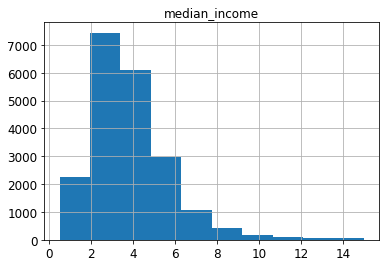

In [326]:
housing.hist(column=["median_income"])

In [327]:
# But, before we do a Stratified Shuffling, let's segment (make groups of ranges) the 'median_income' in 5 categories

In [328]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf], 
                               labels=[1, 2, 3, 4, 5])

In [329]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<AxesSubplot:>

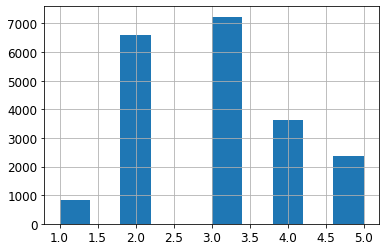

In [330]:
housing["income_cat"].hist()

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

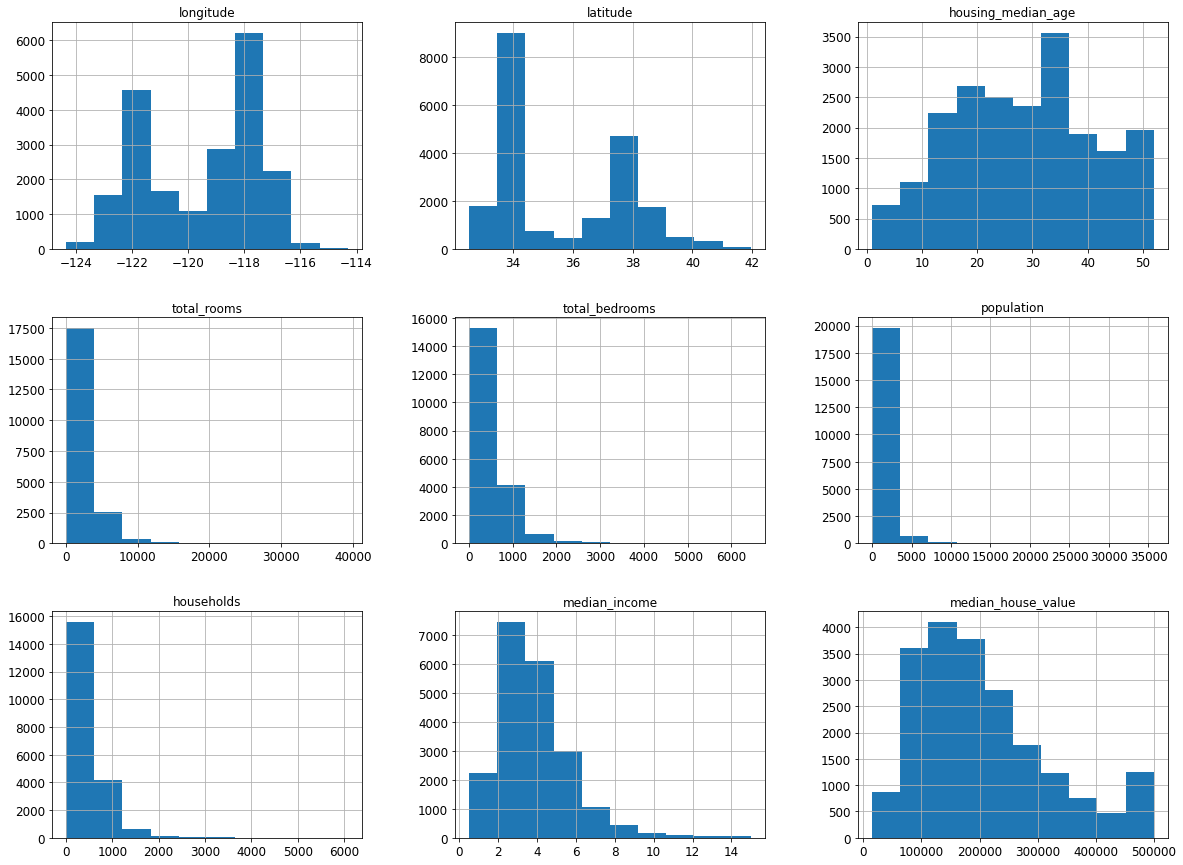

In [331]:
housing.hist(figsize=(20,15))

In [332]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [333]:
type(housing["income_cat"].value_counts())

pandas.core.series.Series

In [334]:
# Now, we can do a stratified shuffle split based on these 5 categories

In [335]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [336]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in sss.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]
    
# loc gets rows  (and/or columns) with particular labels.
# iloc gets rows (and/or columns) at integer locations.

In [337]:
strat_train_set.shape

(16512, 11)

In [338]:
strat_test_set.shape

(4128, 11)

In [339]:
# (4128) / (4128 + 16512) = 0.2 (20% test set)

In [340]:
# proportions in test_set
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [341]:
# proportions in entire dataset
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [342]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


In [343]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3


In [344]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [345]:
# Drop the 'income_cat' attribute. We don't need it anymore,
# because we've already splitted (stratified) the data based on it
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

In [346]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [347]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND


In [348]:
# Until now, we have the training set ('strat_train_set') and the testing set ('strat_test_set')

In [349]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [350]:
# Before we fill in the missing values, we need to convert the
# categorical attributes to numerical attributes

In [351]:
strat_train_set_cat = strat_train_set[["ocean_proximity"]]
strat_train_set_num = strat_train_set.drop(columns=["ocean_proximity"])
strat_train_set_labels = strat_train_set_num[["median_house_value"]]

In [352]:
strat_train_set_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [353]:
strat_train_set_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0


In [354]:
strat_train_set_labels.head()

,median_house_value
17606,286600.0
18632,340600.0
14650,196900.0
3230,46300.0
3555,254500.0


In [355]:
# Until now, we have:
# strat_train_set_num
# strat_train_set_cat
# strat_train_set_labels

In [356]:
# Do the same thing for the testing set

In [357]:
strat_test_set_cat = strat_test_set[["ocean_proximity"]]
strat_test_set_num = strat_test_set.drop(columns=["ocean_proximity"])
strat_test_set_labels = strat_test_set_num[["median_house_value"]]

In [358]:
strat_test_set_cat.head()

,ocean_proximity
5241,<1H OCEAN
10970,<1H OCEAN
20351,<1H OCEAN
6568,INLAND
13285,INLAND


In [359]:
strat_test_set_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0


In [360]:
strat_test_set_labels.head()

,median_house_value
5241,500001.0
10970,240300.0
20351,218200.0
6568,182100.0
13285,121300.0


In [361]:
# Until now, we have:
# strat_test_set_num
# strat_test_set_cat
# strat_test_set_labels

In [362]:
# Define shorter names for variables
train_cat = strat_train_set_cat
train_num = strat_train_set_num
train_lab = strat_train_set_labels

test_cat = strat_test_set_cat
test_num = strat_test_set_num
test_lab = strat_test_set_labels

In [363]:
# I will use the OneHotEncoder for encoding the 'ocean_proximity' attribute
from sklearn.preprocessing import OneHotEncoder

In [364]:
one_hot_enc = OneHotEncoder(sparse=False)
train_cat = one_hot_enc.fit_transform(train_cat)
test_cat = one_hot_enc.transform(test_cat)

In [365]:
one_hot_enc.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [366]:
# Let's fill in the missing values from 'total_bedrooms'
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer() # default: np.nan and strategy mean
train_num = imp_mean.fit_transform(train_num)

In [367]:
# Let's use a ColumnTransformer with one pipeline for categorial attributes and one pipeline for numerical attr

In [368]:
# Define shorter names for variables
train_cat = strat_train_set_cat
train_num = strat_train_set_num
train_lab = strat_train_set_labels

test_cat = strat_test_set_cat
test_num = strat_test_set_num
test_lab = strat_test_set_labels

In [369]:
# !!! Drop labels from training and testing set !!!
train_num.drop("median_house_value", axis=1, inplace=True)
test_num.drop("median_house_value", axis=1, inplace=True)

In [370]:
# Let's try to combine some features
train_num["rooms_per_house"] = train_num["total_rooms"] / train_num["households"]
test_num["rooms_per_house"] = test_num["total_rooms"] / test_num["households"]

train_num["bedrooms_per_house"] = train_num["total_bedrooms"] / train_num["households"]
test_num["bedrooms_per_house"] = test_num["total_bedrooms"] / test_num["households"]

In [371]:
train_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_house
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,1.035398
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,0.955752
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,1.019481
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,1.050992
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,1.042379


In [372]:
train_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [373]:
test_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_house
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,6.715625,1.054167
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,6.388633,1.006144
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,4.973744,1.057078
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,5.546584,0.950311
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,5.877483,1.039735


In [374]:
test_cat.head()

,ocean_proximity
5241,<1H OCEAN
10970,<1H OCEAN
20351,<1H OCEAN
6568,INLAND
13285,INLAND


In [375]:
num_attr = list(train_num)
cat_attr = list(train_cat)

In [376]:
num_attr

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_house',
 'bedrooms_per_house']

In [377]:
cat_attr

['ocean_proximity']

In [378]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   rooms_per_house     16512 non-null  float64
 9   bedrooms_per_house  16354 non-null  float64
dtypes: float64(10)
memory usage: 1.4 MB


In [379]:
# Let's join back the num and cat pandas dataframes
train = train_num.join(train_cat)
test = test_num.join(test_cat)

In [380]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_house,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,1.035398,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,0.955752,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,1.019481,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,1.050992,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,1.042379,<1H OCEAN


In [381]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_house,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,6.715625,1.054167,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,6.388633,1.006144,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,4.973744,1.057078,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,5.546584,0.950311,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,5.877483,1.039735,INLAND


In [382]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   rooms_per_house     16512 non-null  float64
 9   bedrooms_per_house  16354 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(10), object(1)
memory usage: 2.0+ MB


In [383]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   rooms_per_house     4128 non-null   float64
 9   bedrooms_per_house  4079 non-null   float64
 10  ocean_proximity     4128 non-null   object 
dtypes: float64(10), object(1)
memory usage: 516.0+ KB


In [384]:
# Until now, we have: (train, train_lab), (test, test_lab)

In [385]:
# Let's create a ColumnTransformer with 2 pipelines (1 for numerical and 1 for categorical attributes)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [386]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), # fill in the missing values
    ('std_scaler', StandardScaler()), # scale the data
])

In [387]:
cat_pipe = Pipeline([
    ('hot_enc', OneHotEncoder(sparse=False)),
])

In [388]:
col_transf = ColumnTransformer([
    ("num", num_pipe, num_attr),
    ("cat", cat_pipe, cat_attr),
])

In [389]:
# Fit the estimator on the training data and the transform it
col_transf.fit(train)
X_train = col_transf.transform(train)

In [390]:
# Transform the testing data
X_test = col_transf.transform(test)

In [391]:
# X_train - training set
y_train = train_lab.to_numpy()

# X_test - testing set
y_test = test_lab.to_numpy()

In [392]:
X_train.shape

(16512, 15)

In [393]:
y_train.shape

(16512, 1)

In [394]:
X_test.shape

(4128, 15)

In [395]:
y_test.shape

(4128, 1)

In [ ]:
# ------------------------------------------------------------

In [396]:
# Data processing is done
# We can start by trying different models

In [ ]:
# ------------------------------------------------------------

In [397]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [398]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [399]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68794.38906052134

In [400]:
type(X_train)

numpy.ndarray

In [401]:
X_train[:5]

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.12426266,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.28137226,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.15566191,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124, -0.09350339,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.49247384, -0.65929936, -0.92673619,  1.85619316,  2.41221109,
         2.72415407,  2.57097492, -0.44143679, 

In [283]:
y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6.212727876475602e-10

In [402]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [403]:
y_pred = tree_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

In [412]:
y_pred = tree_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

66834.53939213589

In [405]:
# Let's try the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train) 

<ipython-input-405-e7aedcac04e7>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [410]:
y_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18552.5565246675

In [411]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

48078.29042560575

In [407]:
# lin_reg_rmse = 66k 
# forest_rmse  = 48k

In [421]:
# Let's try a SVM

from sklearn.svm import SVR

svm_reg = SVR()
svm_reg.fit(X_train, np.ravel(y_train))

SVR()

In [418]:
y_pred = svm_reg.predict(X_train)
svm_mse = mean_squared_error(y_train, y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

118572.03828347889

In [419]:
y_pred = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

116911.83023085946

In [420]:
# lin_reg_rmse = 66k
# forest_rmse  = 48k
# svm_reg_rmse = 116k

In [426]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'n_estimators': [3, 10, 30],
        'max_features': [2, 4, 6, 8],
    },
    {
        'bootstrap': [False],
        'n_estimators': [3, 10],
        'max_features': [2, 3, 4],
    },
]

forest_reg_grid = RandomForestRegressor(random_state=42)
forest_grid_search = GridSearchCV(forest_reg_grid, param_grid, verbose=2)

In [428]:
forest_grid_search.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=30; total time=   0.5s
[CV] END ....................max_features=2, n_e

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             verbose=2)

In [429]:
forest_grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [431]:
forest_best_model = forest_grid_search.best_estimator_

In [436]:
y_pred = forest_best_model.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

47356.030623127495

In [437]:
# lin_reg_rmse = 66k
# forest_rmse  = 48k
# svm_reg_rmse = 116k
# best_forest_rmse = 47k

In [440]:
feature_importances = forest_best_model.feature_importances_
feature_importances

array([1.17270439e-01, 9.67338251e-02, 4.19506162e-02, 2.81146698e-02,
       2.28717393e-02, 3.33481283e-02, 2.21779372e-02, 3.47665045e-01,
       8.51789932e-02, 2.92710585e-02, 1.90251558e-02, 1.39256199e-01,
       5.52072912e-05, 8.80553046e-03, 8.27545523e-03])

In [477]:
cat_encoder = col_transf.named_transformers_["cat"]["hot_enc"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [485]:
attributes = num_attr + cat_one_hot_attribs

In [486]:
list(zip(feature_importances, attributes))

[(0.1172704390255395, 'longitude'),
 (0.09673382512140885, 'latitude'),
 (0.041950616202487294, 'housing_median_age'),
 (0.02811466978580196, 'total_rooms'),
 (0.02287173933590031, 'total_bedrooms'),
 (0.03334812833307634, 'population'),
 (0.02217793722657931, 'households'),
 (0.34766504501411244, 'median_income'),
 (0.08517899323549444, 'rooms_per_house'),
 (0.029271058531921103, 'bedrooms_per_house'),
 (0.01902515580625625, '<1H OCEAN'),
 (0.13925619939731257, 'INLAND'),
 (5.520729119974758e-05, 'ISLAND'),
 (0.008805530464457024, 'NEAR BAY'),
 (0.008275455228452763, 'NEAR OCEAN')]

In [487]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.34766504501411244, 'median_income'),
 (0.13925619939731257, 'INLAND'),
 (0.1172704390255395, 'longitude'),
 (0.09673382512140885, 'latitude'),
 (0.08517899323549444, 'rooms_per_house'),
 (0.041950616202487294, 'housing_median_age'),
 (0.03334812833307634, 'population'),
 (0.029271058531921103, 'bedrooms_per_house'),
 (0.02811466978580196, 'total_rooms'),
 (0.02287173933590031, 'total_bedrooms'),
 (0.02217793722657931, 'households'),
 (0.01902515580625625, '<1H OCEAN'),
 (0.008805530464457024, 'NEAR BAY'),
 (0.008275455228452763, 'NEAR OCEAN'),
 (5.520729119974758e-05, 'ISLAND')]

In [488]:
# Let's try to add a transformer

In [489]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])


class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
        
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    
    def transform(self, X):
        return X[:, self.feature_indices_]

In [490]:
k = 5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7,  8, 11], dtype=int64)

In [492]:
# Most 5 important features
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'rooms_per_house',
       'INLAND'], dtype='<U18')

In [493]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.34766504501411244, 'median_income'),
 (0.13925619939731257, 'INLAND'),
 (0.1172704390255395, 'longitude'),
 (0.09673382512140885, 'latitude'),
 (0.08517899323549444, 'rooms_per_house')]

In [495]:
# Let's use only the most 5 important features

In [496]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', col_transf),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [ ]:
# ...